# DeepChem의 다양한 Dataset

In [3]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 2.1 MB/s 
     |████████████████████████████████| 36.8 MB 34 kB/s 


In [4]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

# Dataset 다운로드
- dc.molnet.load_XXX() 함수 사용
- load_delaney()를 사용하면 Delaney 용해도 dataset을 다운로드함
 - 1128개 화합물의 용해도 데이터
- 다운로드시 원하는 feature를 선택할 수 있음
 - featurizer : 'ECFP', 'GraphConv', 'Weave', 'smiles2img' 등
 - splitter : 'None', 'index', 'random', 'scaffold', 'stratified' 등

In [5]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

- load_XXX() 리턴 값
 - tasks: 태스크 이름 (타겟 작업이 무엇인지. 하나 또는 복수)
 - datasets: dc.data.Dataset 객체로서 (train, valid, test) 세 부분으로 나누어 줌
 - transformers: dc.trans.Transformer 객체로서 전처리 방법을 알려줌

In [6]:
print(tasks)
print(test_dataset)

['measured log solubility in mols per litre']
<DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['c1cc2ccc3cccc4ccc(c1)c2c34' 'Cc1cc(=O)[nH]c(=S)[nH]1'
 'Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 ' ...
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'Cc1occc1C(=O)Nc2ccccc2'
 'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '], task_names: ['measured log solubility in mols per litre']>


# Dataset과 관련된 정보들
- `DiskDataset`은 하드디스크에 저장하고 액세스할 데이터셋
- `NumpyDataset` 은 메인 메모리에 저장하고 사용할 데이터로 NumPy arrays 형식으로 저장
- `ImageDataset`은 디스크에 저장되는 이미지 데이터 형식

- 여기서 각 행은 샘플을 가리키며 여기서는 분자를 구분하며 다음의 값들을 갖는다
 - The *features*, referred to as `X`.  
 - The *labels*, referred to as `y`.  
 - The *weights*, referred to as `w` (이 샘플의 가중치를 표시)  
 - An *ID*, is a unique identifier (여기서는 SMILES를 사용)

In [7]:
test_dataset.X[:3]

array([<deepchem.feat.mol_graphs.ConvMol object at 0x7fadf140c0d0>,
      dtype=object)

In [8]:
test_dataset.X[0].get_atom_features().shape

(16, 75)

In [9]:
smiles = test_dataset.ids[0]
smiles

'c1cc2ccc3cccc4ccc(c1)c2c34'

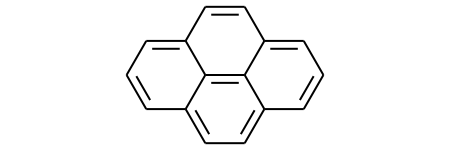

In [10]:
Chem.MolFromSmiles(smiles)

In [11]:
test_dataset.X[0].get_adjacency_list()

[[5, 6],
 [13, 8],
 [12, 7],
 [7, 13],
 [9, 12],
 [0, 10],
 [11, 0],
 [2, 3],
 [1, 11],
 [10, 4],
 [5, 9, 14],
 [8, 6, 14],
 [4, 2, 15],
 [3, 1, 15],
 [11, 15, 10],
 [14, 12, 13]]

# 데이터 샘플 읽기
- 한 샘플씩 : itersamples() 사용하며 소수의 샘플만 읽음으로써 메모리 처리 속도를 높일 수 있음
- 배치 단위로 읽기 : iterbatches() 사용하며 배치 사이즈만큼 데이터 샘플 읽음

In [12]:
for X, y, w, ids in test_dataset.itersamples():
    print(y, ids)

[-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34
[0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1
[-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
[-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
[-0.52891635] C1=Cc2cccc3cccc1c23
[1.10168349] CC1CO1
[-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 
[-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
[-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
[-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 
[-0.38569452] COc2c1occc1cc3ccc(=O)oc23 
[-0.62568785] CN2C(=C(O)c1ccccc1S2(=O)=O)C(=O)Nc3ccccn3 
[-0.39585553] Cc3cc2nc1c(=O)[nH]c(=O)nc1n(CC(O)C(O)C(O)CO)c2cc3C
[-2.05306753] c1ccc(cc1)c2ccc(cc2)c3ccccc3
[-0.29666474] CC34CC(=O)C1C(CCC2=CC(=O)CCC12C)C3CCC4(=O) 
[-0.73213651] c1ccc2c(c1)sc3ccccc23
[-1.27744393] CC23Cc1cnoc1C=C2CCC4C3CCC5(C)C4CCC5(O)C#C
[0.0081655] OC(C(=O)c1ccccc1)c2ccccc2
[0.97588054] OCC2OC(Oc1ccccc1CO)C(O)C(O)C2O
[-0.10796031] CC3C2CCC1(C)C=CC(=O)C(=C1C2OC3=O)C
[0.59847167] O=Cc2ccc1OCOc1c2 
[-0.60149498] CC1CCCCC1NC(=O)N

In [13]:
for X, y, w, ids in test_dataset.iterbatches(batch_size=50):
    print(y.shape)

(50, 1)
(50, 1)
(13, 1)


In [14]:
# 데이터프레임으로 읽기
test_dataset.to_dataframe()

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.601145,1.0,c1cc2ccc3cccc4ccc(c1)c2c34
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.208483,1.0,Cc1cc(=O)[nH]c(=S)[nH]1
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.016027,1.0,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.821917,1.0,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.528916,1.0,C1=Cc2cccc3cccc1c23
...,...,...,...,...
108,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.656304,1.0,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
109,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.743629,1.0,c1ccsc1
110,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.420799,1.0,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
111,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.209570,1.0,Cc1occc1C(=O)Nc2ccccc2


# 넘파이로 데이터셋 생성하기

In [15]:
import numpy as np

X = np.random.random((10, 5))
y = np.random.random((10, 2))
dataset = dc.data.NumpyDataset(X=X, y=y)
print(dataset)

<NumpyDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


In [16]:
dataset.to_dataframe()

,X1,X2,X3,X4,X5,y1,y2,w,ids
0,0.161841,0.949983,0.277347,0.731163,0.860032,0.502290,0.303332,1.0,0
1,0.311193,0.577339,0.977607,0.747465,0.351473,0.789790,0.048347,1.0,1
2,0.441074,0.920280,0.918783,0.034778,0.724125,0.900224,0.406963,1.0,2
3,0.113046,0.104297,0.182390,0.897659,0.346311,0.836740,0.610566,1.0,3
4,0.929524,0.443615,0.628872,0.273341,0.825054,0.573590,0.359389,1.0,4
5,0.968389,0.047964,0.413378,0.423499,0.346226,0.227449,0.514015,1.0,5
6,0.348440,0.869223,0.928877,0.849166,0.369826,0.204400,0.870899,1.0,6
7,0.047991,0.124056,0.868719,0.197589,0.706153,0.679024,0.589467,1.0,7
8,0.238240,0.498767,0.056751,0.262807,0.114269,0.633768,0.179294,1.0,8
9,0.042953,0.986714,0.840396,0.002501,0.073598,0.826034,0.121453,1.0,9


# dc.molnet.load 데이터셋의 종류
https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html#
- MoleculeNet
- Quantum Mechanical Datasets
- Physical Chemistry Datasets
- Chemical Reaction Datasets
- Biochemical/Biophysical Datasets
- Molecular Catalog Datasets (Zinc15, chembl 등)
- Physiology Datasets
- Structural Biology Datasets
- Microscopy Datasets
- Materials Properties Datasets

In [17]:
all_load = [method for method in dir(dc.molnet) if "load_" in method ]
print(len(all_load))
all_load

42


['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']